In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing Dataset

In [37]:
df = pd.read_csv("water_potability dataset.csv")

Exploratory Data Analysis

In [38]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [39]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [40]:
df.shape

(3276, 10)

In [41]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [43]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [44]:
df.duplicated().any()

np.False_

In [45]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Handling Missing Values:

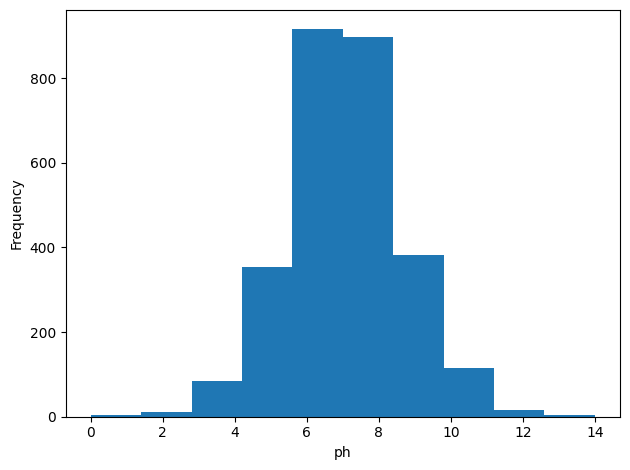

In [46]:
#ph, Sulfate and Trihalomethanes have null values. So, we need to fill these null values

df['ph'].plot(kind ='hist')
plt.xlabel("ph")
plt.tight_layout()
plt.show()

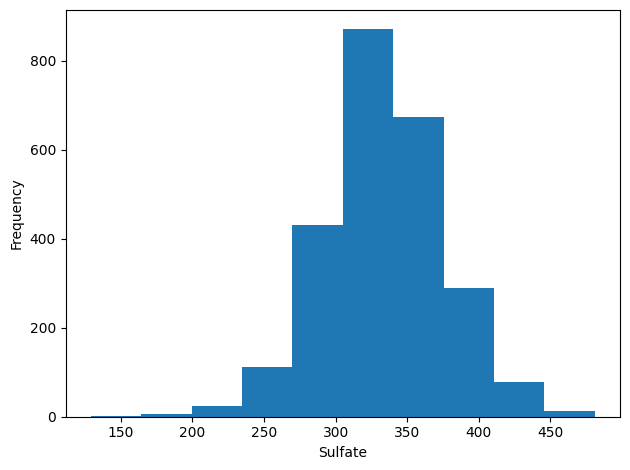

In [47]:
df['Sulfate'].plot(kind="hist")
plt.xlabel("Sulfate")
plt.tight_layout()
plt.show()

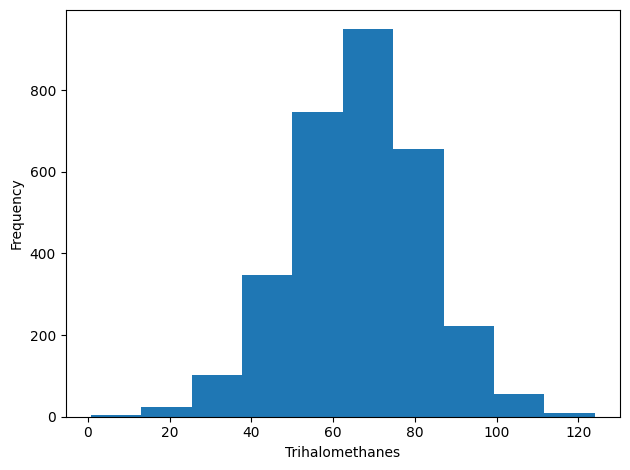

In [48]:
df['Trihalomethanes'].plot(kind="hist")
plt.xlabel("Trihalomethanes")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'KDE Plot of Trihalomethanes')

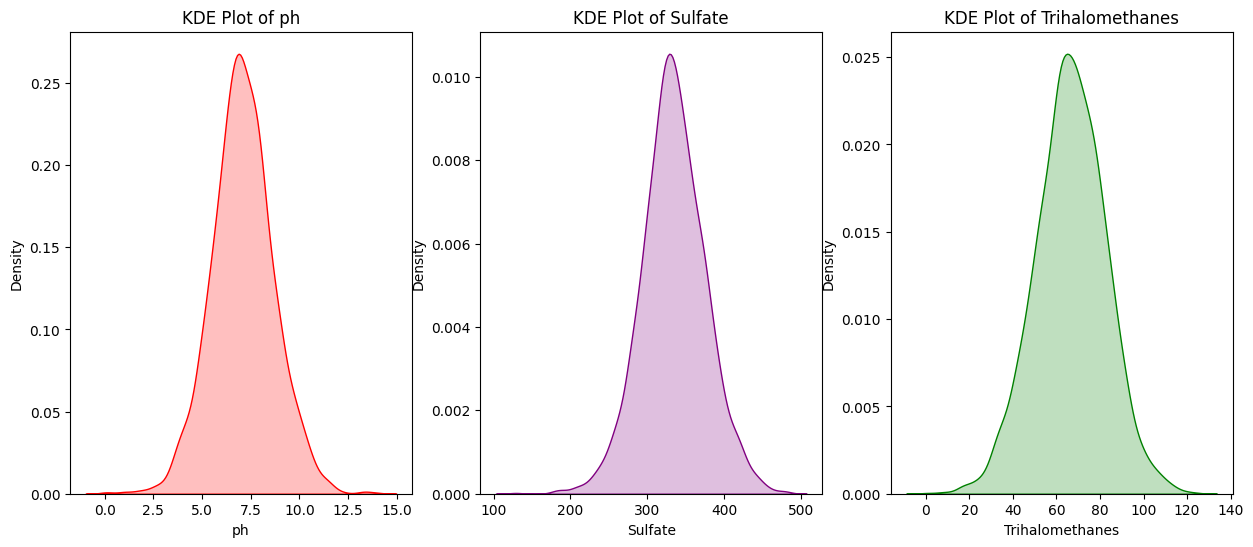

In [49]:
#kde plot
ffig, ax=plt.subplots(1,3, figsize=(15,6))
sns.kdeplot(df.ph,ax=ax[0],color="red",fill=True).set_title("KDE Plot of ph")
sns.kdeplot(df.Sulfate, ax=ax[1], color="purple", fill=True).set_title("KDE Plot of Sulfate")
sns.kdeplot(df.Trihalomethanes,ax=ax[2], color="green",fill=True).set_title("KDE Plot of Trihalomethanes") 

In [50]:
#Filling null values with the mean of that columns
df= df.fillna(df.mean())

In [51]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Checking for Correlation

In [52]:
correlation=df.corr()
correlation

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<Axes: >

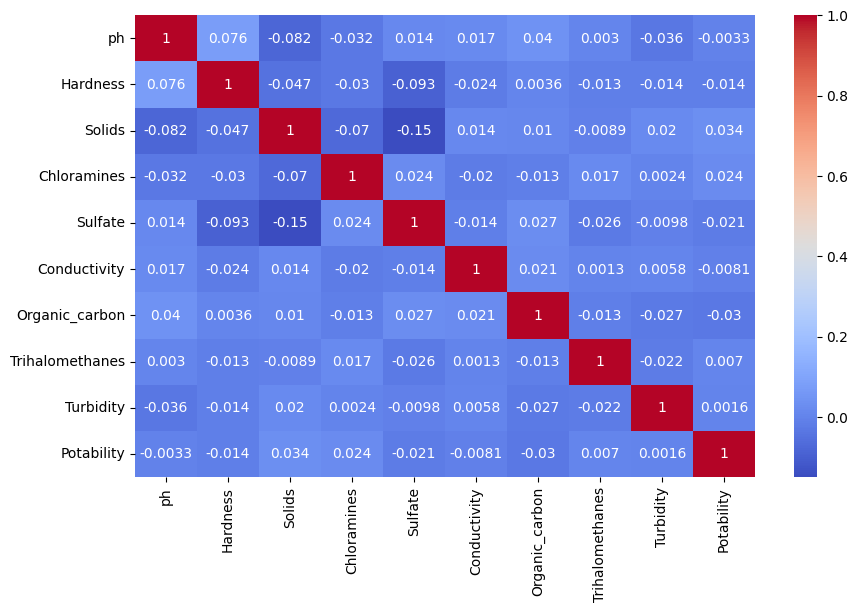

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap="coolwarm")

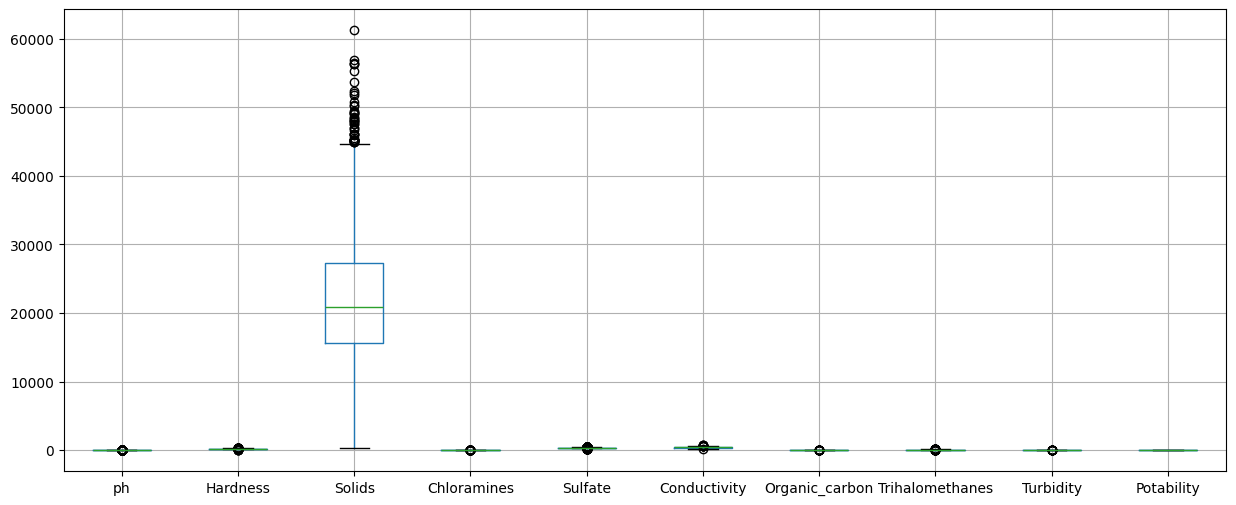

In [54]:
#boxplot
df.boxplot(figsize=(15,6))
plt.show()

In [55]:
df['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

Not removing the elements because it may be important to decide the quality of water 

In [56]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

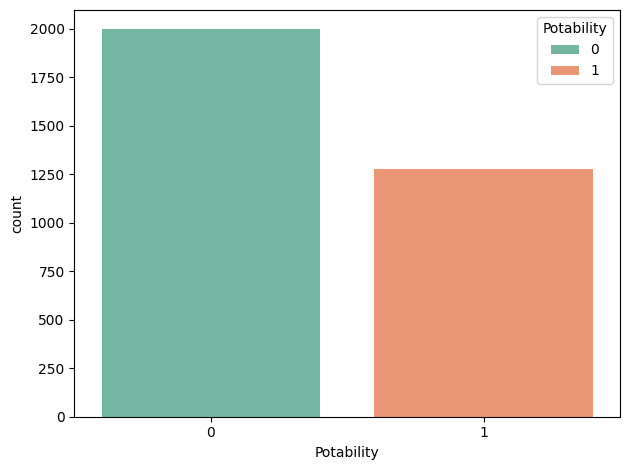

In [57]:
sns.countplot(x="Potability", data=df,hue="Potability", palette="Set2")
plt.tight_layout()
plt.show()

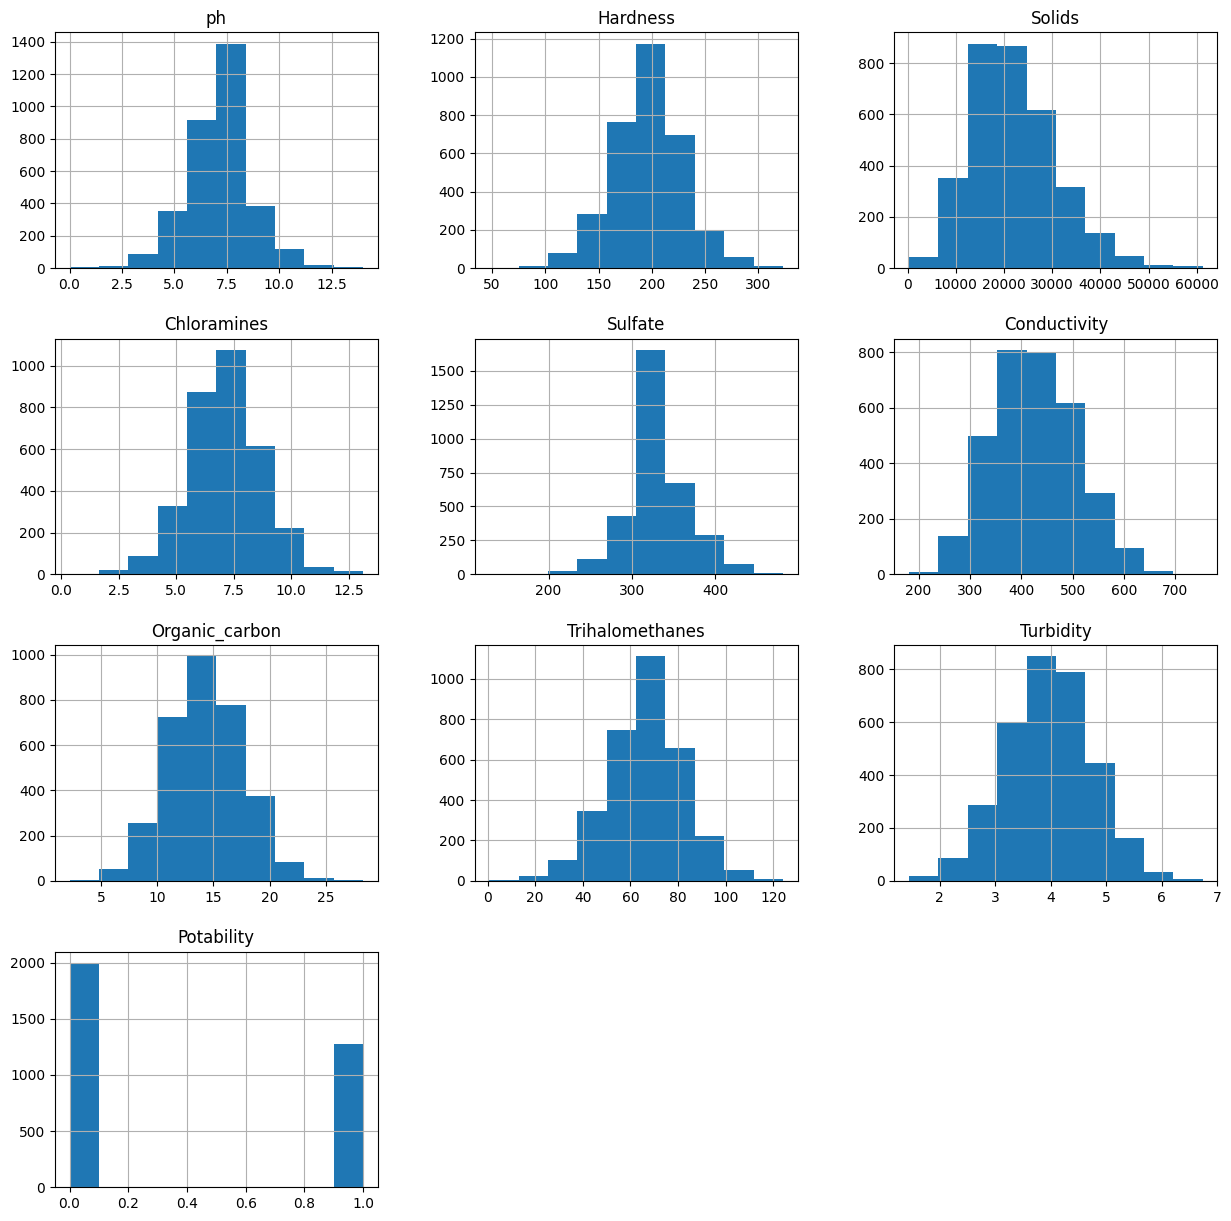

In [58]:
hist_plot=df.hist(figsize=(15,15) )


In [59]:
"""for col in df.columns:
    sns.histplot(data=df,x=col, hue="Potability",kde="True")
    plt.show()"""

'for col in df.columns:\n    sns.histplot(data=df,x=col, hue="Potability",kde="True")\n    plt.show()'

In [60]:
df.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.084658,196.733292,21777.490788,7.092175,334.371700,426.730454,14.364335,66.308522,3.965800
1,7.074754,195.800744,22383.991018,7.169338,332.844122,425.383800,14.160893,66.533513,3.968328


Feature Scaling: Removing the Label i.e. "Potability"

In [61]:
x=df.drop(columns=["Potability"])
y= df["Potability"]

In [62]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
